In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import plot_bioreactor 
import bioreactor_simulation_models
import bioreactor_learner

In [3]:
reload(bioreactor_learner)
reload(bioreactor_simulation_models)
reload(plot_bioreactor)
training_data = bioreactor_learner.generate_evolution_data(num_evolutions=10)

In [4]:
training_data

,culture,culture_prime,ph,substrate,substrate_prime,temperature,times
0,0.200000,0.021918,7.1,1.000000,-0.014246,40,0
1,0.221918,0.021797,7.1,0.985754,-0.019877,40,1
2,0.243715,0.026586,7.1,0.965876,-0.016905,40,2
3,0.270300,0.020347,7.1,0.948972,-0.028940,40,3
4,0.290647,0.037217,7.1,0.920032,-0.026024,40,4
5,0.327864,0.031385,7.1,0.894007,-0.027058,40,5
6,0.359249,0.026517,7.1,0.866949,-0.016364,40,6
7,0.385766,0.031891,7.1,0.850585,-0.037999,40,7
8,0.417657,0.030131,7.1,0.812587,-0.037425,40,8
9,0.447788,0.040092,7.1,0.775161,-0.033530,40,9


In [5]:
feature_scaler, target_scaler, regressor = bioreactor_learner.train_learner(training_data)

In [7]:
regressor.predict([[0.2, 7.0, 0.8, 37.0]])

array([[-0.78065704,  4.13318903]])

In [8]:
model_params = {'feature_scaler': feature_scaler,
                        'target_scaler': target_scaler,
                        'learner': regressor,
                        'ph': 7.0,
                        'temperature': 37.0}
bioreactor_learner.learner_hamiltonian(0.9, 0.21,model_params)

(-0.037725576444932921, 0.052296611139810829)

In [9]:
reload(bioreactor_learner)
initial_substrate = 1.0
initial_culture = 0.2
(evolutions_vs_temperature, evolutions_vs_ph) = bioreactor_simulation_models.run_family_of_models(initial_substrate,
                                                                                                  initial_culture)
(predicted_evolutions_vs_temperature, predicted_evolutions_vs_ph) = \
bioreactor_learner.run_family_predicted_models(initial_substrate, initial_culture, feature_scaler, target_scaler, regressor)

<IPython.core.display.Javascript object>


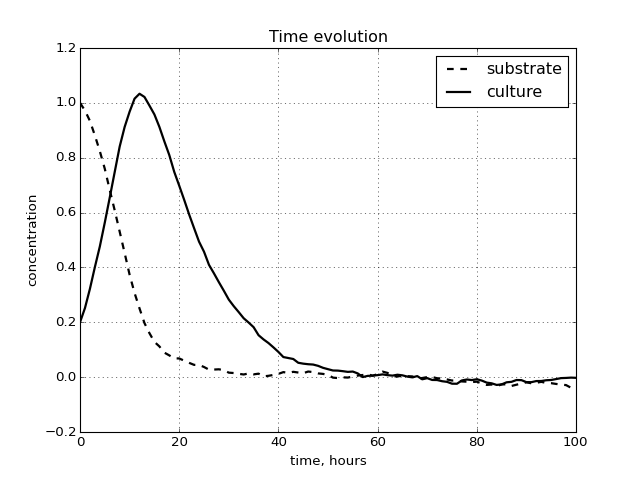

In [10]:
plot_bioreactor.plot_time_evolution(evolutions_vs_temperature[37], title="Time evolution", grid=True, savefig=True, linewidth=2)

<IPython.core.display.Javascript object>


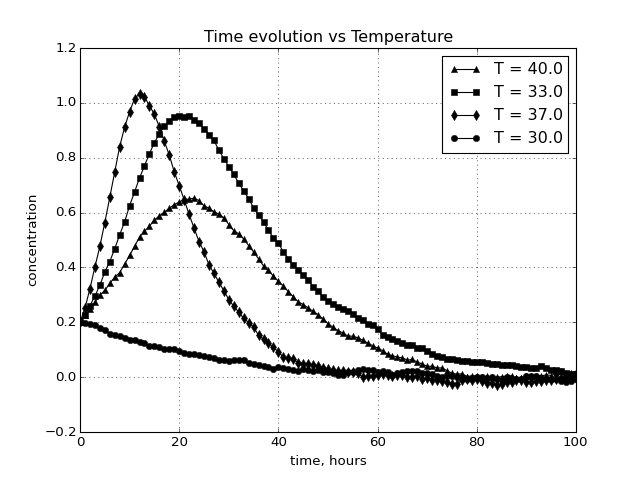

<IPython.core.display.Javascript object>


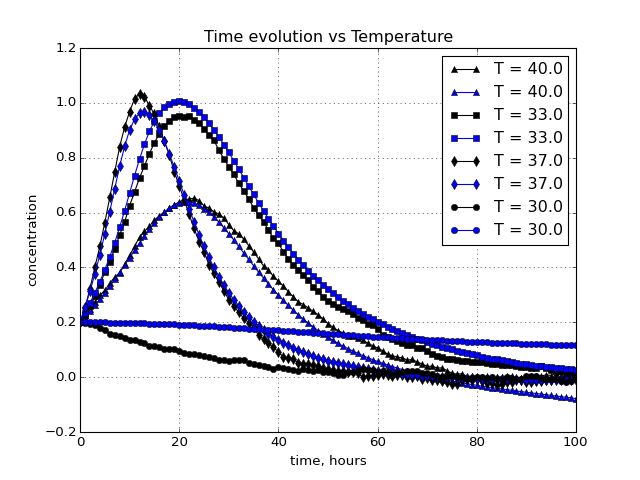

In [11]:
markers = {30: 'o',
           33: 's',
           37: 'd',
           40: '^'
}
plot_bioreactor.plot_family_of_time_evolutions(evolutions_vs_temperature, variable_name="T",markers=markers, 
                                               title="Time evolution vs Temperature", savefig=True)
plot_bioreactor.plot_family_of_time_evolutions(evolutions_vs_temperature, variable_name="T",markers=markers, 
                                               predicted_evolutions=predicted_evolutions_vs_temperature,
                                               title="Time evolution vs Temperature", savefig=True)

<IPython.core.display.Javascript object>


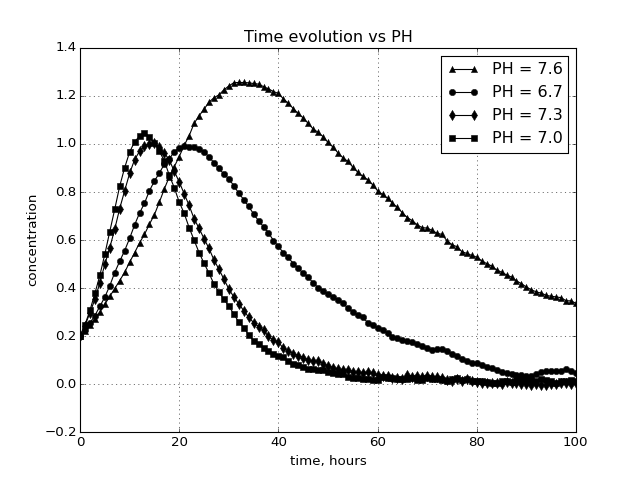

<IPython.core.display.Javascript object>


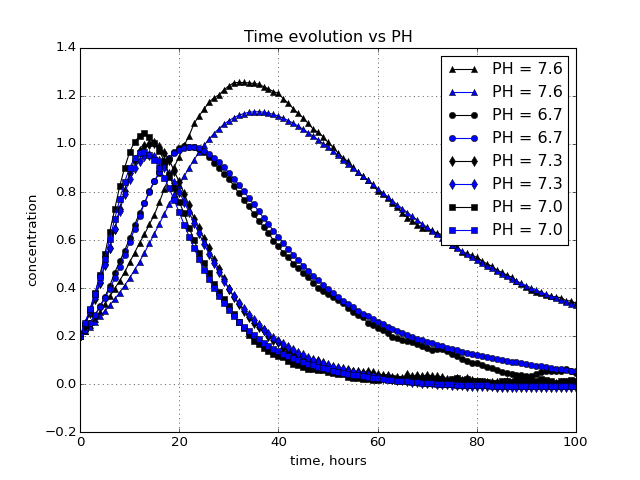

In [12]:
markers = {6.7: 'o',
           7.0: 's',
           7.3: 'd',
           7.6: '^'
}
plot_bioreactor.plot_family_of_time_evolutions(evolutions_vs_ph, variable_name="PH",markers=markers, 
                                               title="Time evolution vs PH",  savefig=True)
plot_bioreactor.plot_family_of_time_evolutions(evolutions_vs_ph, variable_name="PH",markers=markers, 
                                               predicted_evolutions=predicted_evolutions_vs_ph,
                                               title="Time evolution vs PH",  savefig=True)

In [13]:
reload(bioreactor_simulation_models)
reload(bioreactor_learner)
(times, substrate_ts, culture_ts, substrate_prime_ts, culture_prime_ts, temperature_ts, ph_ts) = \
bioreactor_learner.generate_optimal_evolution(initial_substrate, initial_culture,
                               feature_scaler, target_scaler, regressor)

<IPython.core.display.Javascript object>


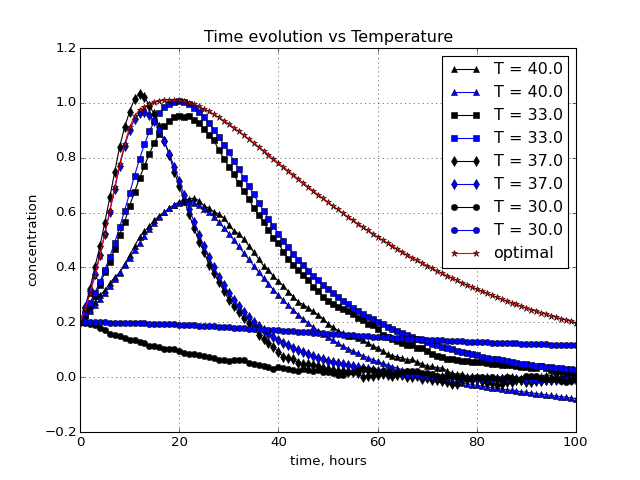

In [14]:
reload(plot_bioreactor)
markers = {30: 'o',
           33: 's',
           37: 'd',
           40: '^'
}
plot_bioreactor.plot_family_of_time_evolutions(evolutions_vs_temperature, variable_name="T",markers=markers, 
                                               predicted_evolutions=predicted_evolutions_vs_temperature,
                                               optimal_evolution=(times, culture_ts),
                                               title="Time evolution vs Temperature",  savefig=True)

In [15]:
ph_ts, temperature_ts

([7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6,
  7.6],
 [37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37.0,
  37

<IPython.core.display.Javascript object>


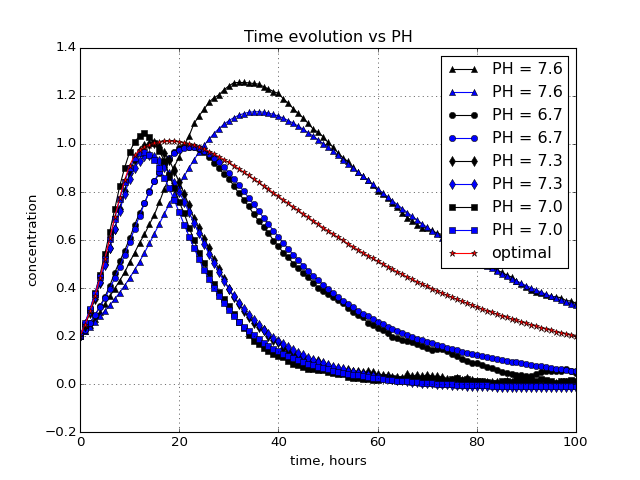

In [16]:
markers = {6.7: 'o',
           7.0: 's',
           7.3: 'd',
           7.6: '^'
}
plot_bioreactor.plot_family_of_time_evolutions(evolutions_vs_ph, variable_name="PH",markers=markers, 
                                               predicted_evolutions=predicted_evolutions_vs_ph,
                                               optimal_evolution=(times, culture_ts),
                                               title="Time evolution vs PH", savefig=True)